# Przegląd metod redukcji wymiarów w danych wielowymiarowych wraz z prezentacją i wizualizacją ich działania

Cel projektu: celem projektu jest dokonanie przeglądu i implementacji wybranych metod redukcji wymiarów dla
danych wielowymiarowych (np. PCA, t-SNE, UMAP). Aplikacja powinna umożliwiać wczytywanie
danych, przeprowadzanie redukcji wymiarów oraz wizualizację wyników (np. w 2D lub 3D), a także
porównanie efektywności poszczególnych metod.

In [50]:
# Wszystkie wymagane importy

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_swiss_roll, fetch_openml, make_blobs
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, accuracy_score, classification_report
import pandas as pd
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import time

In [51]:
plt.style.use('dark_background')

In [52]:
scaler = StandardScaler()

## Wizualizacje

### Inicjalizacja Swiss Roll i Blobs 3D

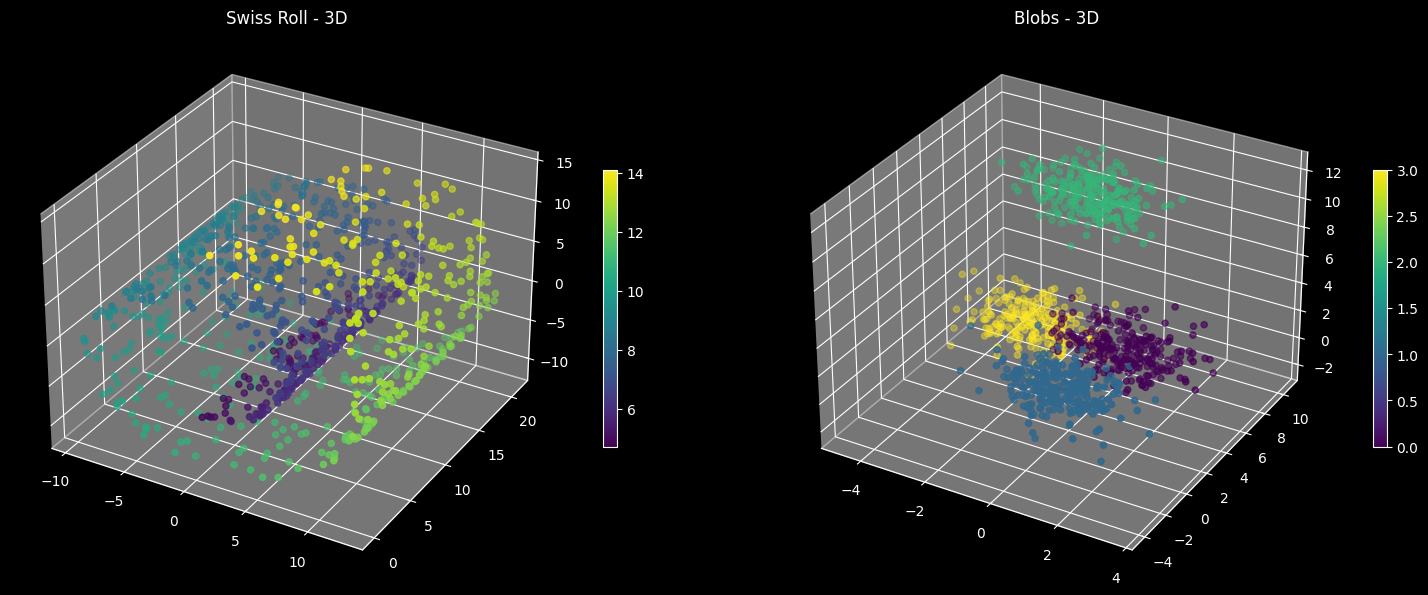

In [53]:
fig = plt.figure(figsize=(16, 6))

# Swiss Roll 3D
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
X_swiss, y_swiss = make_swiss_roll(n_samples=1000, noise=0.05)
p1 = ax1.scatter(X_swiss[:,0], X_swiss[:,1], X_swiss[:,2], c=y_swiss, cmap=plt.cm.viridis)
ax1.set_title("Swiss Roll - 3D")
fig.colorbar(p1, ax=ax1, shrink=0.5)

# Blobs 3D
ax2 = fig.add_subplot(1, 2, 2, projection='3d')
X_blobs, y_blobs = make_blobs(n_samples=1000, centers=4, n_features=3, random_state=0)
p2 = ax2.scatter(X_blobs[:,0], X_blobs[:,1], X_blobs[:,2], c=y_blobs, cmap=plt.cm.viridis)
ax2.set_title("Blobs - 3D")
fig.colorbar(p2, ax=ax2, shrink=0.5)

plt.tight_layout()
plt.show()

### PCA

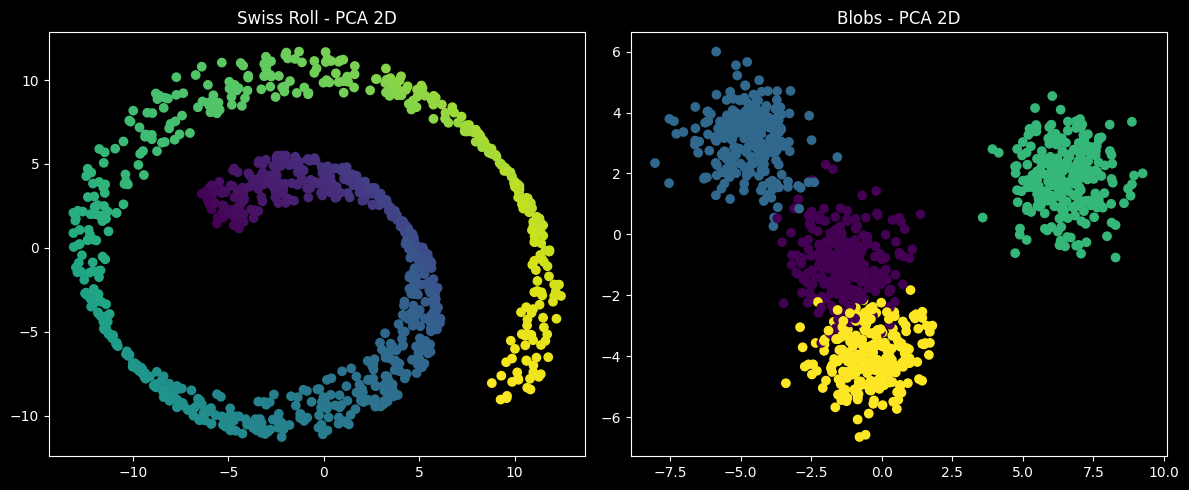

PCA on swiss roll computation time: 0.0032 
PCA on blobs computation time: 0.0001 


In [54]:
pca_swiss = PCA(n_components=2)
start_swiss = time.perf_counter()
X_pca_swiss = pca_swiss.fit_transform(X_swiss)
end_swiss = time.perf_counter()

start_blobs = time.perf_counter()
pca_blobs = PCA(n_components=2)
end_blobs = time.perf_counter()
X_pca_blobs = pca_blobs.fit_transform(X_blobs)

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

axs[0].scatter(X_pca_swiss[:,0], X_pca_swiss[:,1], c=y_swiss, cmap=plt.cm.viridis)
axs[0].set_title("Swiss Roll - PCA 2D")

axs[1].scatter(X_pca_blobs[:,0], X_pca_blobs[:,1], c=y_blobs, cmap=plt.cm.viridis)
axs[1].set_title("Blobs - PCA 2D")

plt.tight_layout()
plt.show()

print(f"PCA on swiss roll computation time: {end_swiss - start_swiss:.4f} ")
print(f"PCA on blobs computation time: {end_blobs - start_blobs:.4f} ")

### TSNE

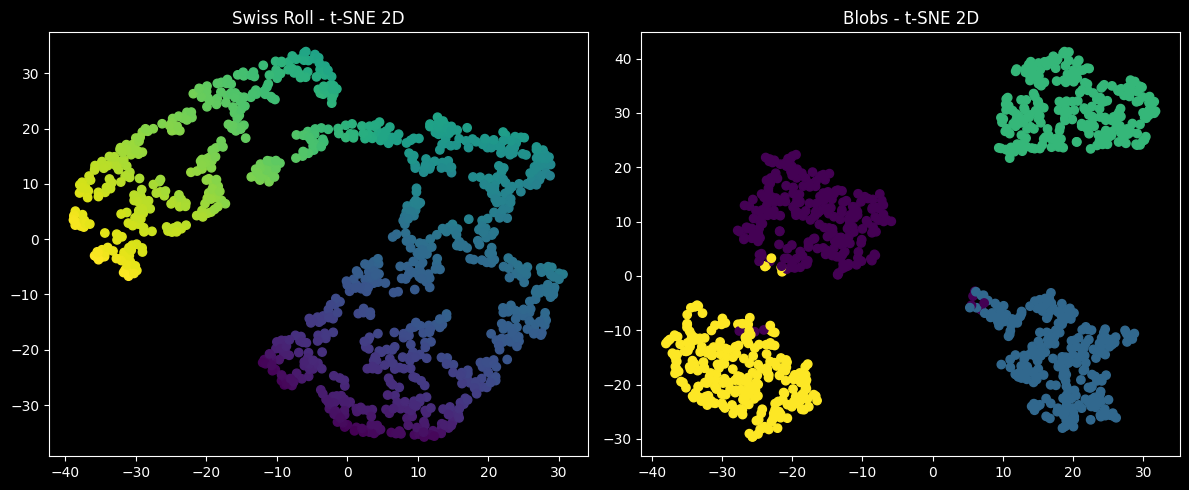

t-SNE on swiss roll computation time: 4.2003 
t-SNE on blobs computation time: 4.4188 


In [55]:
tsne_swiss = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=30, random_state=42)
start_swiss = time.perf_counter()
X_tsne_swiss = tsne_swiss.fit_transform(X_swiss)
end_swiss = time.perf_counter()

tsne_blobs = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=30, random_state=42)
start_blobs = time.perf_counter()
X_tsne_blobs = tsne_blobs.fit_transform(X_blobs)
end_blobs = time.perf_counter()

fig, axs = plt.subplots(1, 2, figsize=(12, 5))
axs[0].scatter(X_tsne_swiss[:,0], X_tsne_swiss[:,1], c=y_swiss, cmap=plt.cm.viridis)
axs[0].set_title("Swiss Roll - t-SNE 2D")
axs[1].scatter(X_tsne_blobs[:,0], X_tsne_blobs[:,1], c=y_blobs, cmap=plt.cm.viridis)
axs[1].set_title("Blobs - t-SNE 2D")
plt.tight_layout()
plt.show()

print(f"t-SNE on swiss roll computation time: {end_swiss - start_swiss:.4f} ")
print(f"t-SNE on blobs computation time: {end_blobs - start_blobs:.4f} ")

### UMAP

/home/wojciech/.local/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/wojciech/.local/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/home/wojciech/.local/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/wojciech/.local/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


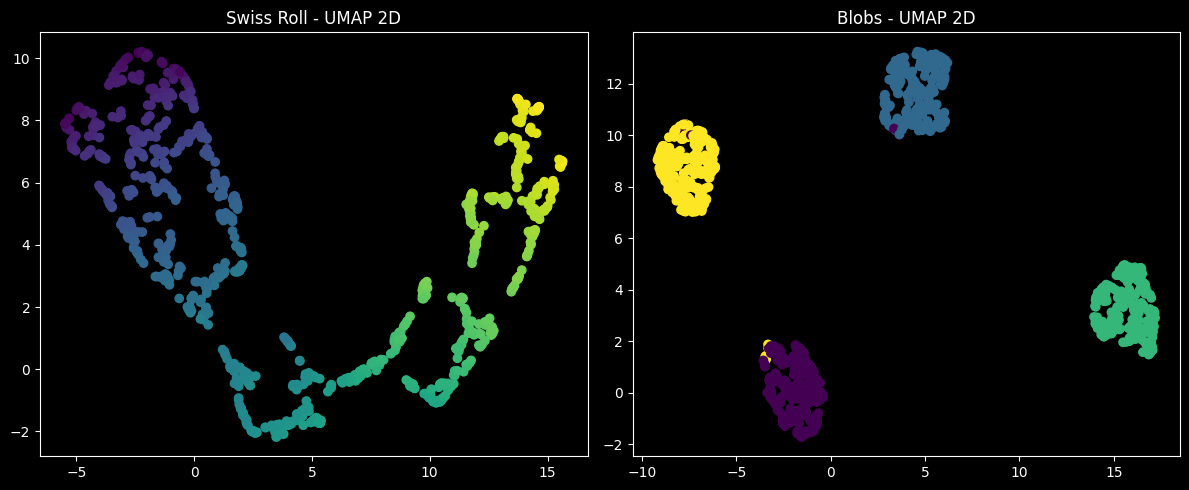

UMAP on swiss roll computation time: 3.2253 
UMAP on blobs computation time: 3.4181 


In [56]:
umap_swiss = umap.UMAP(n_components=2, n_neighbors=15, min_dist=0.1, random_state=42)
start_swiss = time.perf_counter()
X_umap_swiss = umap_swiss.fit_transform(X_swiss)
end_swiss = time.perf_counter()

umap_blobs = umap.UMAP(n_components=2, n_neighbors=15, min_dist=0.1, random_state=42)
start_blobs = time.perf_counter()
X_umap_blobs = umap_blobs.fit_transform(X_blobs)
end_blobs = time.perf_counter()

fig, axs = plt.subplots(1, 2, figsize=(12, 5))
axs[0].scatter(X_umap_swiss[:,0], X_umap_swiss[:,1], c=y_swiss, cmap=plt.cm.viridis)
axs[0].set_title("Swiss Roll - UMAP 2D")
axs[1].scatter(X_umap_blobs[:,0], X_umap_blobs[:,1], c=y_blobs, cmap=plt.cm.viridis)
axs[1].set_title("Blobs - UMAP 2D")
plt.tight_layout()
plt.show()

print(f"UMAP on swiss roll computation time: {end_swiss - start_swiss:.4f} ")
print(f"UMAP on blobs computation time: {end_blobs - start_blobs:.4f} ")

### Porównania dla Swiss Roll

/home/wojciech/.local/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/wojciech/.local/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


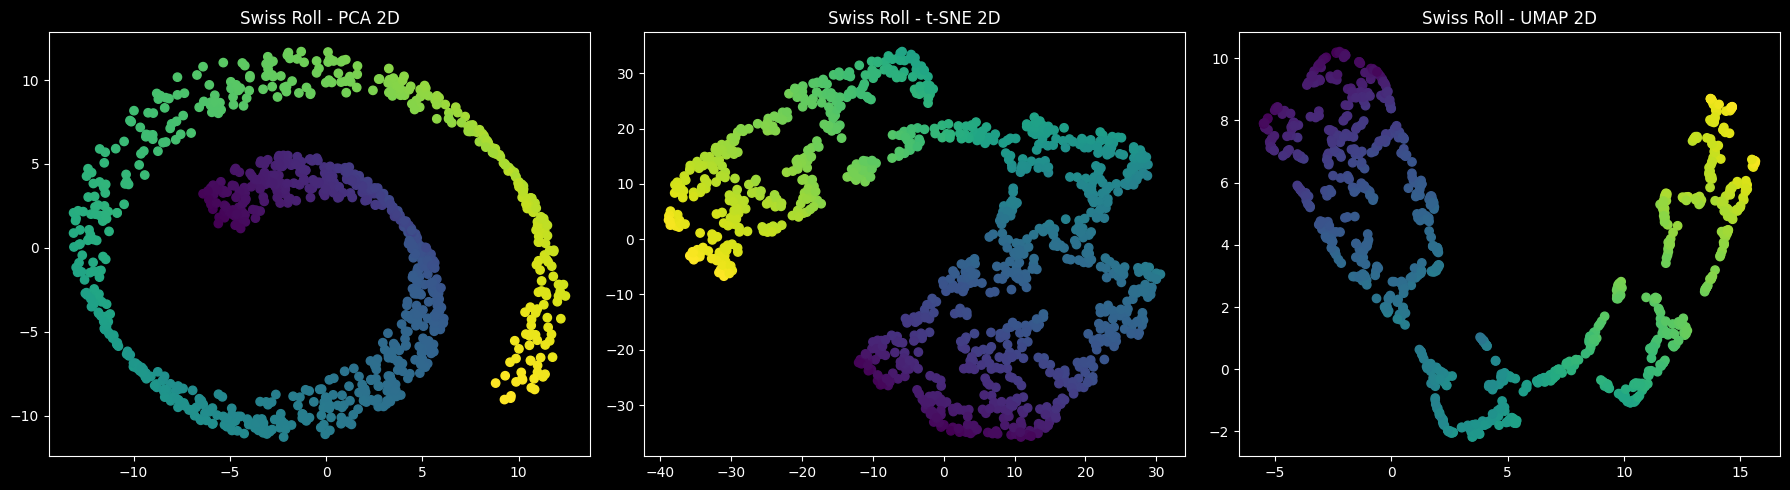

In [57]:
pca_swiss = PCA(n_components=2)
X_pca_swiss = pca_swiss.fit_transform(X_swiss)

tsne_swiss = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=30, random_state=42)
X_tsne_swiss = tsne_swiss.fit_transform(X_swiss)

umap_swiss = umap.UMAP(n_components=2, n_neighbors=15, min_dist=0.1, random_state=42)
X_umap_swiss = umap_swiss.fit_transform(X_swiss)

fig, axs = plt.subplots(1, 3, figsize=(18, 5))

axs[0].scatter(X_pca_swiss[:,0], X_pca_swiss[:,1], c=y_swiss, cmap=plt.cm.viridis)
axs[0].set_title("Swiss Roll - PCA 2D")

axs[1].scatter(X_tsne_swiss[:,0], X_tsne_swiss[:,1], c=y_swiss, cmap=plt.cm.viridis)
axs[1].set_title("Swiss Roll - t-SNE 2D")

axs[2].scatter(X_umap_swiss[:,0], X_umap_swiss[:,1], c=y_swiss, cmap=plt.cm.viridis)
axs[2].set_title("Swiss Roll - UMAP 2D")

plt.tight_layout()
plt.show()

- PCA nie jest w stanie rozwinąć struktury Swiss Roll – dane są na siebie nałożone, co utrudnia interpretację.
- t-SNE bardzo dobrze rozdziela poszczególne fragmenty Swiss Roll, zachowując lokalną strukturę danych.
- UMAP również dobrze odwzorowuje strukturę Swiss Roll, zachowując zarówno lokalne, jak i częściowo globalne relacje.
- Metody nieliniowe (t-SNE, UMAP) są znacznie skuteczniejsze od PCA dla danych o złożonej, nieliniowej strukturze.

### Porównania dla Blobls

/home/wojciech/.local/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/wojciech/.local/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


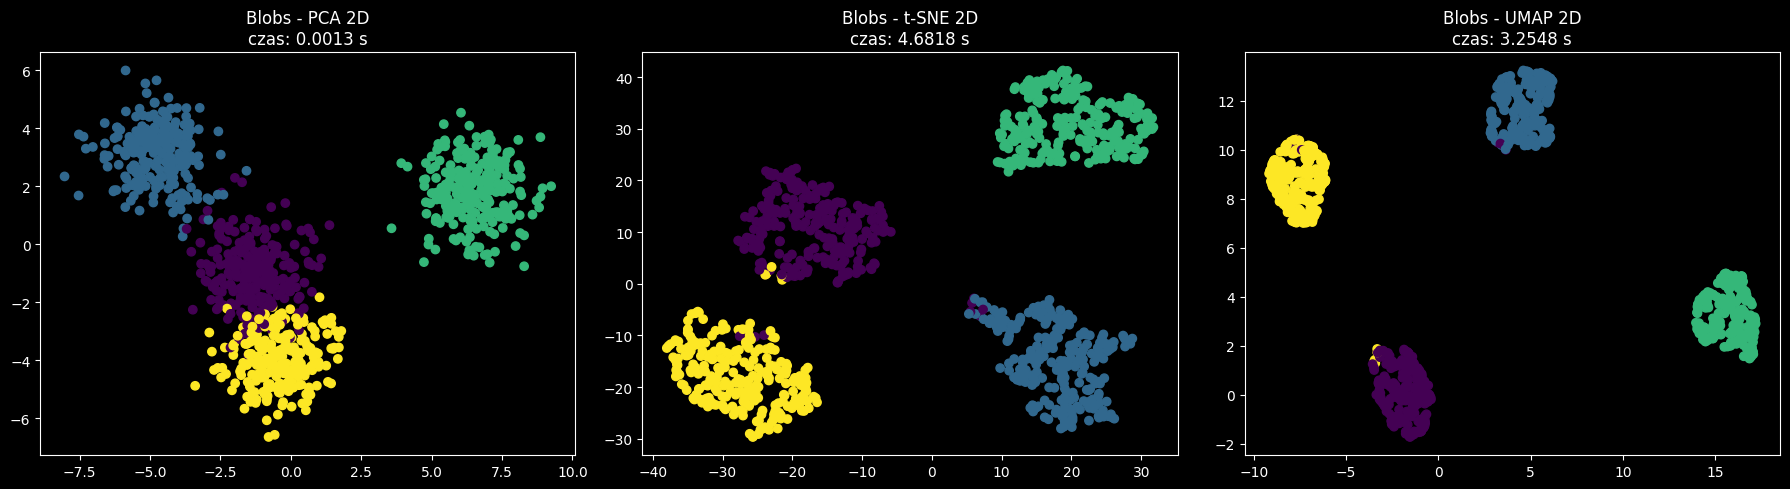

In [58]:
# PCA
start_pca = time.perf_counter()
pca_blobs = PCA(n_components=2)
X_pca_blobs = pca_blobs.fit_transform(X_blobs)
end_pca = time.perf_counter()

# t-SNE
start_tsne = time.perf_counter()
tsne_blobs = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=30, random_state=42)
X_tsne_blobs = tsne_blobs.fit_transform(X_blobs)
end_tsne = time.perf_counter()

# UMAP
start_umap = time.perf_counter()
umap_blobs = umap.UMAP(n_components=2, n_neighbors=15, min_dist=0.1, random_state=42)
X_umap_blobs = umap_blobs.fit_transform(X_blobs)
end_umap = time.perf_counter()



fig, axs = plt.subplots(1, 3, figsize=(18, 5))

axs[0].scatter(X_pca_blobs[:,0], X_pca_blobs[:,1], c=y_blobs, cmap=plt.cm.viridis)
axs[0].set_title(f"Blobs - PCA 2D\nczas: {end_pca - start_pca:.4f} s")

axs[1].scatter(X_tsne_blobs[:,0], X_tsne_blobs[:,1], c=y_blobs, cmap=plt.cm.viridis)
axs[1].set_title(f"Blobs - t-SNE 2D\nczas: {end_tsne - start_tsne:.4f} s")

axs[2].scatter(X_umap_blobs[:,0], X_umap_blobs[:,1], c=y_blobs, cmap=plt.cm.viridis)
axs[2].set_title(f"Blobs - UMAP 2D\nczas: {end_umap - start_umap:.4f} s")

plt.tight_layout()
plt.show()

- Wszystkie trzy metody (PCA, t-SNE, UMAP) dobrze rozdzielają skupiska (bloby) w 2D.
- PCA jest najszybsze i wystarczające dla danych o prostych, liniowych zależnościach.
- t-SNE i UMAP również poprawnie odwzorowują rozkład skupisk, ale są wolniejsze od PCA.
- Dla tego typu danych nie widać dużej przewagi metod nieliniowych nad PCA.

## Mnist

In [ ]:
mnist = fetch_openml('mnist_784', version=1)
X_mnist, y_mnist = mnist['data'], mnist['target']
y_mnist = y_mnist.astype(int)
X_mnist = X_mnist[:10000]
y_mnist = y_mnist[:10000]

# PCA
start_pca = time.perf_counter()
pca_mnist = PCA(n_components=2)
X_mnist_pca = pca_mnist.fit_transform(X_mnist)
end_pca = time.perf_counter()

# t-SNE
start_tsne = time.perf_counter()
tsne_mnist = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=30, random_state=42)
X_mnist_tsne = tsne_mnist.fit_transform(X_mnist)
end_tsne = time.perf_counter()

# UMAP
start_umap = time.perf_counter()
umap_mnist = umap.UMAP(n_components=2, n_neighbors=15, min_dist=0.1, random_state=42)
X_mnist_umap = umap_mnist.fit_transform(X_mnist)
end_umap = time.perf_counter()

fig, axs = plt.subplots(1, 3, figsize=(18, 5))

axs[0].scatter(X_mnist_pca[:, 0], X_mnist_pca[:, 1], c=y_mnist, cmap='tab10', s=5)
axs[0].set_title(f"MNIST - PCA 2D\nczas: {end_pca - start_pca:.2f} s")

axs[1].scatter(X_mnist_tsne[:, 0], X_mnist_tsne[:, 1], c=y_mnist, cmap='tab10', s=5)
axs[1].set_title(f"MNIST - t-SNE 2D\nczas: {end_tsne - start_tsne:.2f} s")

axs[2].scatter(X_mnist_umap[:, 0], X_mnist_umap[:, 1], c=y_mnist, cmap='tab10', s=5)
axs[2].set_title(f"MNIST - UMAP 2D\nczas: {end_umap - start_umap:.2f} s")

for ax in axs:
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()
plt.show()